In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

In [4]:
postings_data = pd.read_csv('../data/Lightcast, UK Postings Sample.csv', low_memory=False)
complete_df = postings_data[postings_data['JOB_DESCRIPTION'].notnull()]

In [139]:
kws_list_sb = ['climate','climate-change','global warming','renewable','renewables','green energy','circular','zero waste',
               'net zero','sustainable','sustainability','low carbon','low-carbon','carbon-neutral','reduce carbon', 'carbon reduction',
               'carbon footprint','zero carbon','esg','green tech','green transition','sfdr','eu taxonomy','green bonds', 'carbon free',
               'carbon-free','sdg','biodiversity','eco-friendly', 'environmentally friendly']

green_inds_array = [complete_df[complete_df['JOB_DESCRIPTION'].str.contains(i)].index.values
 for i in kws_list_sb]

green_inds = [i for j in green_inds_array for i in j]

# Remove duplicates
green_inds = list(dict.fromkeys(green_inds))

In [140]:
green_df = complete_df.loc[green_inds]
green_df

,,POSTED,TITLE_NAME,SOC_4,SOC_4_NAME,SOC_3,SOC_3_NAME,SOC_2,SOC_2_NAME,LOT_OCCUPATION_NAME,...,INDUSTRY,IS_INTERNSHIP,IS_REMOTE,SPECIALIZED_SKILLS_NAME,COMMON_SKILLS_NAME,SOFTWARE_SKILLS_NAME,CERTIFICATIONS_NAME,EDULEVELS_NAME_MIN,SALARY,JOB_DESCRIPTION
85,821523163.0,20/08/2021,Empowerment Coaches,2134.0,IT project and programme managers,213.0,Information Technology and Telecommunications ...,21.0,"Science, Research, Engineering and Technology ...",IT Project Manager,...,Legal and accounting activities,False,False,"[\n ""Agile Methodology"",\n ""Branding"",\n ""E...","[\n ""Communications"",\n ""Research"",\n ""Rela...","[\n ""Microsoft PowerPoint"",\n ""Microsoft Exc...",[],NaN,NaN,"Assistant Manager, WorldClimate Empowerment, O..."
632,768024615.0,13/03/2019,Unclassified,7111.0,Sales and retail assistants,711.0,Sales Assistants and Retail Cashiers,71.0,Sales Occupations,Retail Sales Associate,...,Employment activities,False,False,"[\n ""Aerial Work Platforms"",\n ""Construction...","[\n ""Management"",\n ""Communications""\n]",[],[],NaN,NaN,Title Scissor Lift IPAF Op's with CCDO Sala...
717,806637789.0,23/02/2021,Fashion Merchandising Interns,7130.0,Sales supervisors,713.0,Sales Supervisors,71.0,Sales Occupations,Retail Store Manager / Supervisor,...,Employment activities,False,False,"[\n ""Merchandising"",\n ""Supplier Relationshi...","[\n ""Forecasting"",\n ""Management"",\n ""Budge...",[],[],NaN,95000.0,Head of Merchandising Fast Fashion\n\nQuest Se...
805,867275563.0,14/01/2023,Management Accountants,2421.0,Chartered and certified accountants,242.0,"Business, Research and Administrative Professi...",24.0,"Business, Media and Public Service Professionals",Accountant,...,Public administration and defence; compulsory ...,False,True,"[\n ""Financial Statements"",\n ""Accounting"",\...","[\n ""Forecasting"",\n ""Management"",\n ""Budge...","[\n ""Microsoft Teams"",\n ""Microsoft PowerPoi...","[\n ""Chartered Institute Of Management Accoun...",NaN,NaN,Contents\nLocation\nAbout the job\nBenefits\nT...
1358,816553716.0,28/06/2021,Sustainability Consultants,5449.0,Other skilled trades n.e.c.,544.0,Other Skilled Trades,54.0,"Textiles, Printing and Other Skilled Trades",Sustainability Specialist,...,"Computer programming, consultancy and related ...",False,True,"[\n ""Mitigation"",\n ""Benchmarking"",\n ""ISO ...","[\n ""Management"",\n ""Communications"",\n ""In...",[],[],NaN,NaN,EcoAct UK Principal Sustainability Consultant\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85386,824100673.0,12/09/2021,Platform Engineers,8125.0,Metal working machine operatives,812.0,Plant and Machine Operatives,81.0,"Process, Plant and Machine Operatives",NaN,...,"Financial service activities, except insurance...",False,False,"[\n ""Tooling"",\n ""Linux"",\n ""Test Automatio...",[],"[\n ""Linux"",\n ""Python (Programming Language...",[],NaN,NaN,Senior Platform Engineer (GCP)\n\nLinux Recrui...
87902,824087972.0,12/09/2021,Laboratory Analysts,2423.0,Management consultants and business analysts,242.0,"Business, Research and Administrative Professi...",24.0,"Business, Media and Public Service Professionals",Data / Data Mining Analyst,...,"Financial service activities, except insurance...",False,False,"[\n ""Chemistry"",\n ""Laboratory Information M...","[\n ""Communications"",\n ""Leadership"",\n ""Op...","[\n ""SAP Applications""\n]",[],NaN,NaN,SHIFT LABORATORY ANALYST\n\nPosted by Adzuna o...
89841,858247650.0,30/09/2022,General Science Teachers,2319.0,Teaching and other educational professionals n...,231.0,Teaching and Educational Professionals,23.0,Teaching and Educational Professionals,Substitute Teacher,...,Employment activities,False,False,"[\n ""Classroom Management"",\n ""Lesson Planni...","[\n ""Rapport Building""\n]",[],[],NaN,NaN,General Cover Teacher\nPosted yesterday by Mil...
93928,770999310.0,13/05/2019,Mechanical Fitters,2122.0,Mechanical engineers,212.0,Engineering Professionals,21.0,"Scien

<AxesSubplot:ylabel='SOC_2_NAME'>

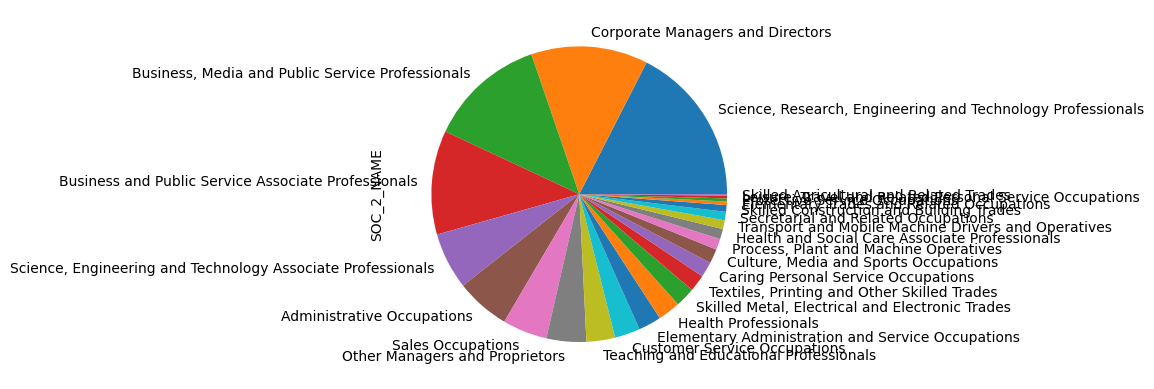

In [95]:
green_df['SOC_2_NAME'].value_counts().plot(kind='pie')

In [105]:
old = postings_data['SOC_2_NAME'].value_counts(normalize=True).sort_index()
old

Administrative Occupations                                     0.07422
Business and Public Service Associate Professionals            0.09159
Business, Media and Public Service Professionals               0.09558
Caring Personal Service Occupations                            0.06057
Corporate Managers and Directors                               0.07183
Culture, Media and Sports Occupations                          0.01423
Customer Service Occupations                                   0.02781
Elementary Administration and Service Occupations              0.04764
Elementary Trades and Related Occupations                      0.00822
Health Professionals                                           0.06014
Health and Social Care Associate Professionals                 0.01521
Leisure, Travel and Related Personal Service Occupations       0.01076
Other Managers and Proprietors                                 0.02931
Process, Plant and Machine Operatives                          0.01249
Protec

In [106]:
new = green_df['SOC_2_NAME'].value_counts(normalize=True).sort_index()
new

Administrative Occupations                                     0.059288
Business and Public Service Associate Professionals            0.113740
Business, Media and Public Service Professionals               0.127735
Caring Personal Service Occupations                            0.016794
Corporate Managers and Directors                               0.127735
Culture, Media and Sports Occupations                          0.015776
Customer Service Occupations                                   0.027735
Elementary Administration and Service Occupations              0.024936
Elementary Trades and Related Occupations                      0.003817
Health Professionals                                           0.024682
Health and Social Care Associate Professionals                 0.011196
Leisure, Travel and Related Personal Service Occupations       0.003053
Other Managers and Proprietors                                 0.043511
Process, Plant and Machine Operatives                          0

<AxesSubplot:ylabel='% Difference'>

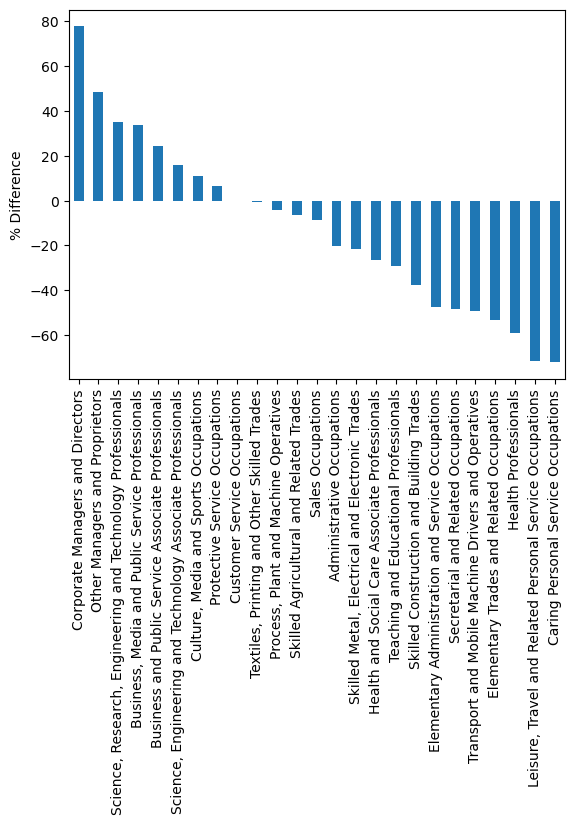

In [114]:
diffs = new - old
perc_diffs = diffs/old*100
perc_diffs.sort_values(ascending=False).plot(kind='bar',ylabel='% Difference')

In [115]:
kws_list_sb

['climate',
 'climate-change',
 'global warming',
 'renewable',
 'renewables',
 'green energy',
 'circular',
 'zero waste',
 'net zero',
 'sustainable',
 'sustainability',
 'low carbon',
 'low-carbon',
 'carbon-neutral',
 'reduce carbon',
 'carbon reduction',
 'carbon footprint',
 'zero carbon',
 'esg',
 'green tech',
 'green transition',
 'sfdr',
 'eu taxonomy',
 'green bonds',
 'carbon free',
 'carbon-free',
 'sdg',
 'biodiversity',
 'eco-friendly',
 'environmentally friendly']